In [18]:
import math
import statistics
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import glob 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
os.chdir(r'C:/Users/Vandhana/Documents/iim skills/python/class 5')

In [20]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv")) 
append_data = []
for x in csv_files:
    df = pd.read_csv(x)
    df.columns = df.iloc[1]
    df = df.iloc[2:].reset_index(drop= True)
    append_data.append(df)
df_final = pd.concat(append_data)
df_final = df_final[['Date','channelKey', 'ProductKey','UnitCost', 'UnitPrice', 'SalesQuantity','ReturnQuantity', 'ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
       'TotalCost', 'SalesAmount', 'GeographyKey']]

C:\Users\Vandhana\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
xls = pd.ExcelFile('lookup1.xlsx')
df1 = pd.read_excel(xls, 'Product')
df2 = pd.read_excel(xls, 'Geography')
df3 = pd.read_excel(xls, 'Channel')

In [22]:
df_final[["channelKey",'ProductKey','GeographyKey']]= df_final[["channelKey",'ProductKey','GeographyKey']].astype(int)
df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']] = df_final[['UnitCost', 'UnitPrice',
       'SalesQuantity', 'ReturnQuantity', 'ReturnAmount', 'DiscountQuantity',
       'DiscountAmount', 'TotalCost', 'SalesAmount']].astype(float)
df_final1 = pd.merge(df_final,df3,how = "left",left_on='channelKey', right_on='ChannelKey')
df_final1 = pd.merge(df_final1,df2,how = "left",left_on='GeographyKey', right_on='GeographyKey')
df_final1 = pd.merge(df_final1,df1,how = "left",left_on='ProductKey', right_on='ProductKey')
df_final1 = df_final1.drop(columns= ['channelKey','GeographyKey','ProductKey'])

In [23]:
Stat = df_final1[['Date', 'UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']]
Stat = Stat.set_index("Date")
Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']] = Stat[['UnitCost', 'UnitPrice','TotalCost',
       'SalesAmount']].astype(int)

In [24]:
df_final1.columns

Index(['Date', 'UnitCost', 'UnitPrice', 'SalesQuantity', 'ReturnQuantity',
       'ReturnAmount', 'DiscountQuantity', 'DiscountAmount', 'TotalCost',
       'SalesAmount', 'ChannelKey', 'ChannelName', 'ContinentName',
       'ProductName', 'Sub category', 'Category'],
      dtype='object')

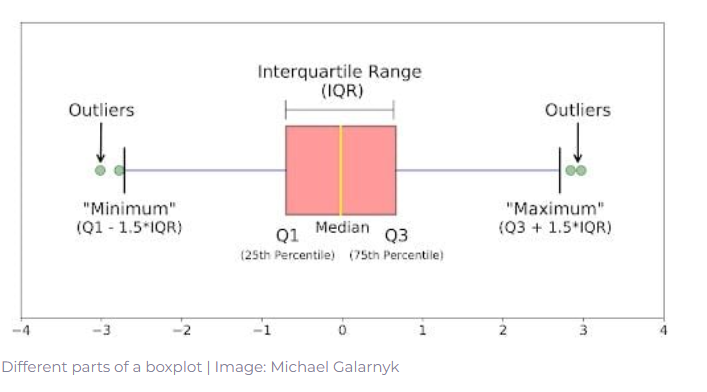

In [27]:
Box_plot = [1,1,3,4,1,2,4,5,2,4,15,21]
x = np.quantile(Box_plot, [0,0.25,0.5,0.75,1])

print(x)

[ 1.    1.75  3.5   4.25 21.  ]


In [28]:
statistics.median(Box_plot)

3.5

<Axes: >

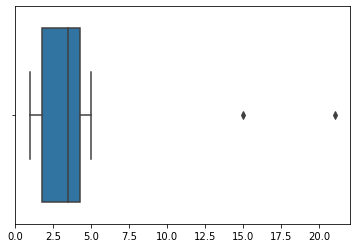

In [29]:
sns.boxplot(x = Box_plot)

In [12]:
statistics.median(Stat["UnitCost"])

84

<Axes: xlabel='UnitCost'>

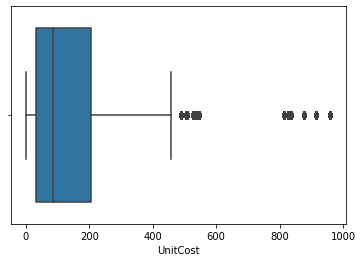

In [8]:
sns.boxplot(x = Stat['UnitCost'])

In [32]:
for x in ['UnitCost']:
    q75,q25 = np.percentile(Stat.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Stat.loc[Stat[x] < min,x] = np.nan
    Stat.loc[Stat[x] > max,x] = np.nan

In [33]:
Stat = Stat.dropna(axis = 0)

<Axes: xlabel='UnitCost'>

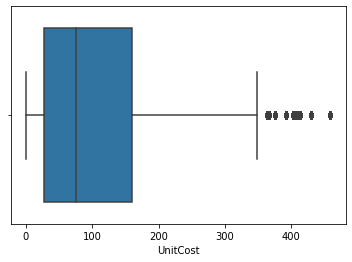

In [34]:
sns.boxplot(x = Stat['UnitCost'])

<Axes: xlabel='UnitCost', ylabel='ChannelName'>

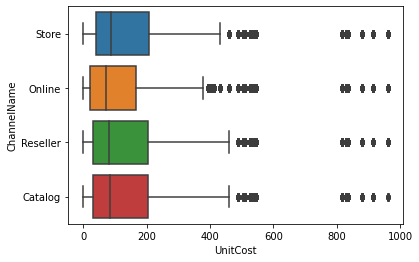

In [10]:
sns.boxplot(data = df_final1, x= 'UnitCost', y = 'ChannelName')

<Axes: xlabel='UnitCost', ylabel='ChannelName'>

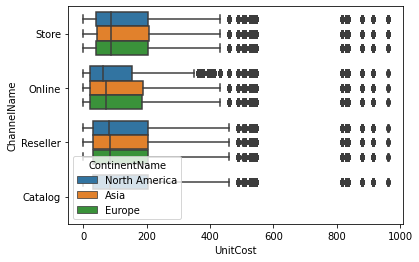

In [60]:
sns.boxplot(data = df_final1, x= 'UnitCost', y = 'ChannelName', hue = 'ContinentName' )

# Outlier detection

https://www.kaggle.com/code/faressayah/outlier-detection-using-pdf-and-z-score

# 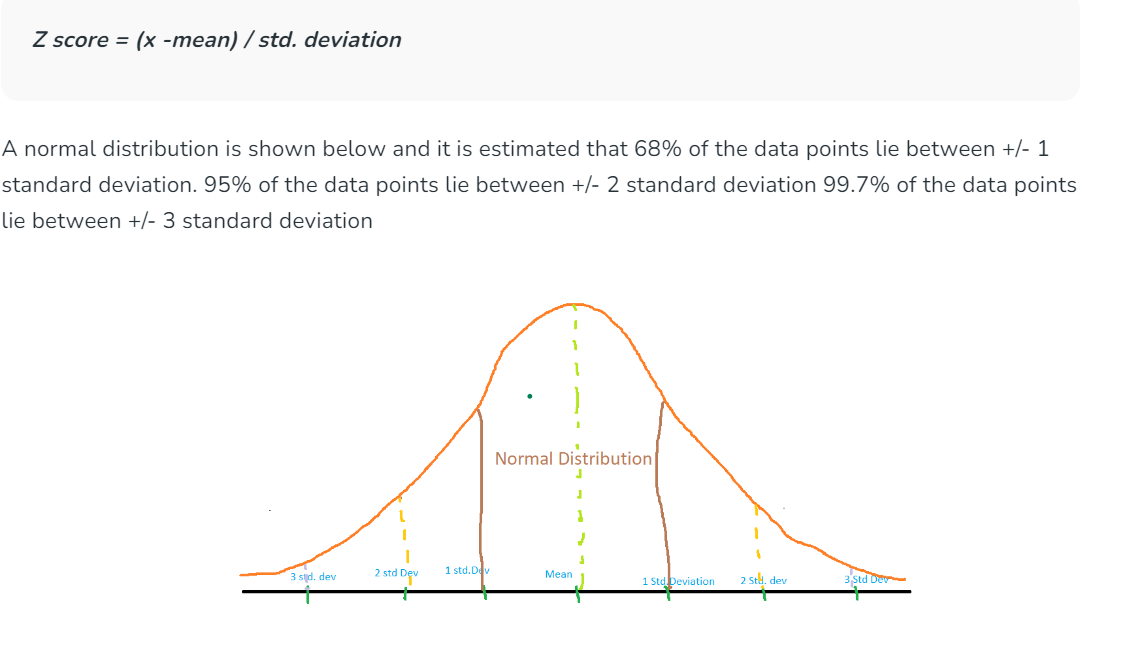

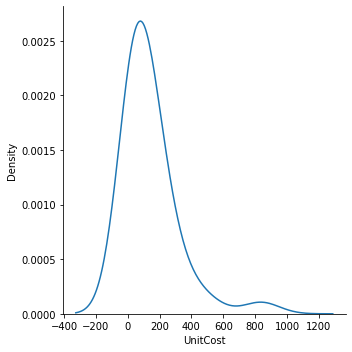

In [35]:
sns.displot(df_final1, x="UnitCost",kind = "kde",bw_adjust=10)

In [36]:
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 2.6666666666666665
std. deviation is 3.3598941782277745


In [37]:
threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [15]


In [49]:
UnitCost = df_final1["UnitCost"]




In [50]:
mean = statistics.mean(UnitCost)

In [51]:
mean

139.86949238224327

In [52]:
std = statistics.stdev(UnitCost)

In [53]:
std

167.48810606461953

In [54]:
threshold = 3
outlier_eliminiated = []
for i in UnitCost:
    z = (i-mean)/std
    if z < threshold:
        outlier_eliminiated.append(i)


In [55]:
outlier_eliminiated = pd.DataFrame(outlier_eliminiated)

In [56]:
outlier_eliminiated = outlier_eliminiated.rename(columns = {0 : "Data"})

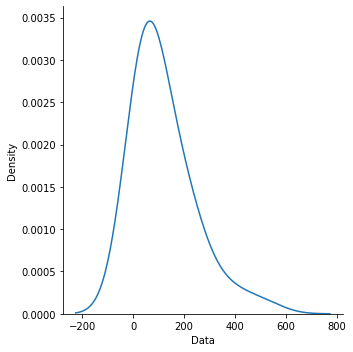

In [57]:
sns.displot(outlier_eliminiated, x="Data",kind = "kde",bw_adjust=10)

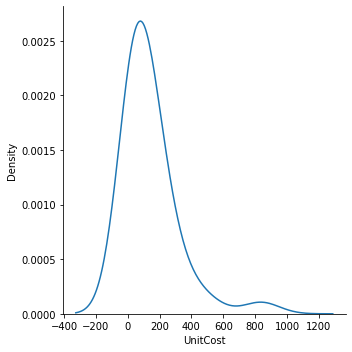

In [73]:
sns.displot(df_final1, x="UnitCost",kind = "kde",bw_adjust=10)

# Matplotlip

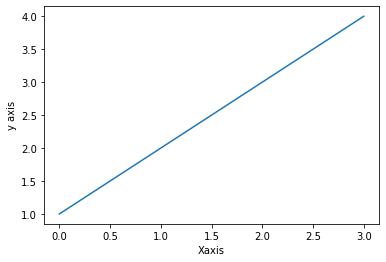

In [70]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.ylabel('y axis')
plt.xlabel("Xaxis")
plt.show()

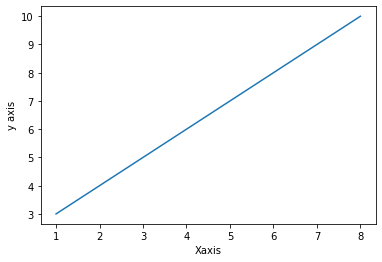

In [80]:


xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints)
plt.ylabel('y axis')
plt.xlabel("Xaxis")
plt.show()

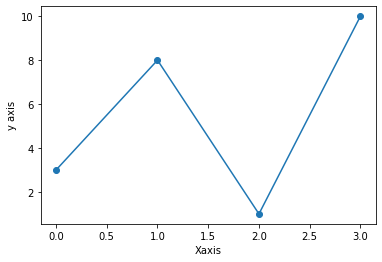

In [81]:
ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, marker = 'o')
plt.ylabel('y axis')
plt.xlabel("Xaxis")
plt.show()

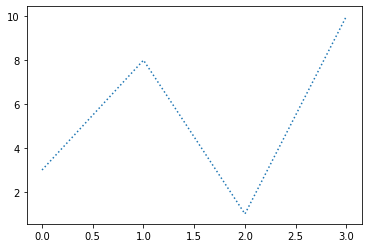

In [82]:
ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, linestyle = 'dotted')
plt.show()

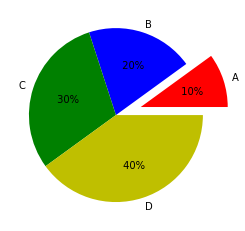

In [103]:


x = [10,20,30,40]
y = ["A","B","C","D"]

explode = [0.3,0.0,0.0,0.0]
colors = ['r','b','g','y']



plt.pie(x,labels = y,explode = explode,colors = colors,autopct =" %1i%%") # autopct = %0.2f%%

plt.show()

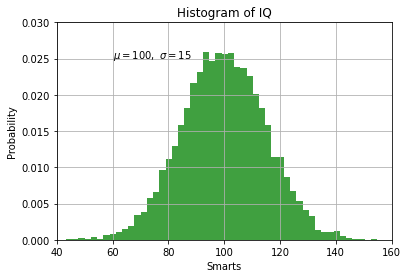

In [106]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
n 
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

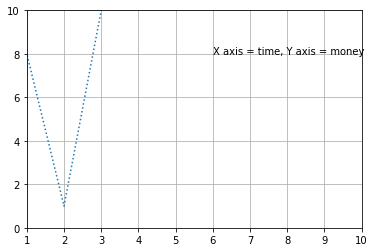

In [115]:
ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, linestyle = 'dotted')

plt.axis([1, 10, 0, 10])
plt.grid(True)
plt.text(6,8,r'X axis = time, Y axis = money')
plt.show()

In [72]:
%matplotlib inline
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [74]:
img = np.asarray(Image.open('C:/Users/Vandhana/Documents/iim skills/python/class 5/image.jpg'))
print(repr(img))

array([[[186, 204, 118],
        [194, 212, 126],
        [195, 213, 129],
        ...,
        [190, 197,  93],
        [194, 201,  97],
        [183, 190,  86]],

       [[198, 216, 130],
        [204, 222, 136],
        [203, 221, 137],
        ...,
        [203, 210, 106],
        [207, 214, 110],
        [196, 203,  99]],

       [[195, 214, 125],
        [200, 219, 130],
        [199, 217, 131],
        ...,
        [201, 208, 104],
        [205, 212, 106],
        [194, 201,  95]],

       ...,

       [[200, 207, 103],
        [212, 219, 113],
        [210, 217, 111],
        ...,
        [129, 153,  39],
        [160, 187,  70],
        [155, 182,  65]],

       [[207, 214, 110],
        [219, 226, 120],
        [217, 224, 118],
        ...,
        [130, 154,  40],
        [153, 180,  63],
        [151, 178,  61]],

       [[191, 198,  94],
        [203, 210, 104],
        [201, 208, 102],
        ...,
        [130, 154,  40],
        [130, 155,  38],
        [118, 145,  28]]

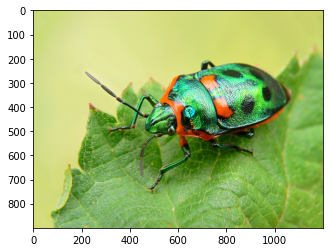

In [75]:
imgplot = plt.imshow(img)

In [3]:
import numpy as np
x = np.random.randint(10,size=(50))

In [4]:
x

array([1, 1, 8, 9, 7, 6, 3, 4, 8, 5, 9, 7, 5, 4, 8, 9, 6, 6, 7, 0, 6, 5,
       5, 3, 4, 3, 8, 5, 3, 9, 3, 1, 0, 3, 6, 1, 7, 7, 9, 5, 1, 5, 8, 2,
       5, 7, 4, 4, 5, 6])

In [5]:
x = np.random.randn(100)

In [6]:
x

array([ 9.13446539e-01, -7.70810736e-01, -5.60207004e-01, -8.14342535e-01,
        1.12217059e-01, -1.01050243e+00,  5.72726812e-02,  1.28288105e-01,
        7.68172857e-01,  1.74430001e+00, -2.30530175e-01,  1.24789420e-01,
       -9.36736598e-01, -4.93911379e-01, -6.39777551e-02,  1.26267394e-03,
       -3.50877169e-01, -1.19326406e+00, -7.73482198e-01,  6.68984263e-01,
       -5.76637412e-01,  1.02739549e+00,  8.72406087e-01,  3.53038457e-01,
       -5.70701728e-01,  7.38864773e-01, -1.66407582e+00, -1.23490334e+00,
        1.67249662e+00,  1.47807984e+00,  1.40085721e-01,  3.74313277e-02,
        6.54071696e-01,  4.21161287e-01, -1.47750776e+00,  1.15150176e+00,
       -5.14208705e-01,  2.63275017e-01, -1.49219053e+00,  1.36283382e+00,
       -3.49257347e-01, -4.96190393e-01,  3.18303504e-01,  7.80292689e-02,
        3.51466706e-01, -6.96651786e-01,  7.02200540e-01, -7.43220773e-01,
       -1.02485002e-01, -5.94303436e-01,  1.43514350e+00,  8.75834828e-01,
        4.51804424e-01,  

# class 6